<a href="https://colab.research.google.com/github/MaximTislenko/GB_med_stat_R/blob/main/Base_Diagr_02_06_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
library(tidyverse)
library(readxl)

# Часть II
# Базовые методы
В первой части мы исследовали среду R и узнали, как получить данные из самых разных источников, агрегировать и подготовить эти данные к дальнейшему анализу. После импортирования данных в программу и подготовки к обработке наступает следующий этап – изучение каждой переменной в отдельности, чтобы узнать, как распределены значения каждой переменной. Это помогает узнать характеристики выборки, обнаружить неожиданные или проблемные значения и выбрать подходящие ста
тистические методы. Затем, как правило, переменные изучаются попарно. При этом выявляются взаимосвязи между переменными и начинается построение более сложных моделей.

Вторая часть посвящена графическим и статистическим методам получения основных сведений о данных. В главе 6 описаны методы визуализации распределения отдельных переменных. Для категориальных данных это столбиковые и круговые диаграммы, а также относительно новые диаграммы типа «плоское дерево» (tree map). Для числовых переменных гистограммы, диаграммы распределения плотности, коробчатые диаграммы (или диаграм-
мы размахов), точечные диаграммы и менее известные «скрипичные диаграммы». Все эти диаграммы нужны, чтобы понять, как распределены значения одной переменной.

В главе 7 описаны статистические методы вычисления обобщенных характеристик отдельных переменных и взаимосвязей между парами переменных. Глава начинается с описания способов определения обобщенных характеристик числовых данных (как для всего набора данных, так и для его части). Затем описывается построение сводных и частотных таблиц для обобщения категориальных данных. И в завершение главы обсуждаются основные приемы изучения взаимосвязей между двумя переменными, включая корреляцию, критерий хи-квадрат, критерий Стьюдента и непараметрические методы.

К концу второй части книги вы научитесь использовать основные графические и статистические методы, доступные в R, для описания своих данных, исследования различий между группами и выявления значимых взаимосвязей между переменными.

# Глава 6
# Базовые диаграммы
Какие бы данные ни анализировались, прежде всего нужно посмотреть на них. Какие значения у каждой переменной встречаются чаще всего? Каков диапазон разброса данных? Есть ли какие-нибудь необычные наблюдения? В R реализовано множество функций для визуализации данных. В этой главе мы рассмотрим диаграммы, построенные на основе одной категориальной или непрерывной переменной и помогающие:
* увидеть характер распределения значений переменой;
* сравнить распределение переменной с двумя или более группами.

В обоих случаях переменная может быть непрерывной (например, расход топлива машиной в милях на галлон) или категориальной (например, результат лечения: отсутствует, незначительный, заметный). В следующих главах мы познакомимся с диаграммами, отображающими более сложные взаимосвязи между переменными.

Разделы этой главы посвящены столбиковым и круговым диаграммам, диаграммам вида «плоское дерево», гистограммам, диаграммам распределения плотности, коробчатым, скрипичным и точечным диаграммам. Какие-то из них могут быть уже знакомы вам, а какие-то (как, например, плоские деревья и скрипичные диаграммы) окажутся новыми. Нашей задачей будет, как всегда, лучше понять данные и поделиться своими открытиями с другими. Начнем со столбиковых диаграмм.

## Столбиковые диаграммы
Столбиковые диаграммы *(bar plot)* отражают распределение (частоту разных значений) категориальной переменной в виде вертикальных или горизонтальных столбиков. Создать столбиковую диаграмму можно с помощью пакета ggplot2, используя такой код:
```
ggplot(data, aes(x=catvar) + geom_bar()
```
где `data` – таблица данных, а `catvar` – категориальная переменная.

В примерах, следующих ниже, демонстрируются результаты исследования нового метода лечения ревматоидного артрита. Данные хранятся в таблице `Arthritis`, распространяемой с пакетом vcd. Этот пакет не входит в базовый дистрибутив R, поэтому перед использованием его нужно скачать и установить, выполнив инструкцию `install.packages("vcd")`. Учтите, что пакет vcd не нужен для построения столбиковых диаграмм. Мы загружаем его, только чтобы получить доступ к таблице данных` Arthritis`.

In [40]:
install.packages("vcd")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [41]:
Arthritis

,ID,Treatment,Sex,Age,Improved
,<int>,<fct>,<fct>,<int>,<ord>
1,57,Treated,Male,27,Some
2,46,Treated,Male,29,None
3,77,Treated,Male,30,None
4,17,Treated,Male,32,Marked
5,36,Treated,Male,46,Marked
6,23,Treated,Male,58,Marked
7,75,Treated,Male,59,None
8,39,Treated,Male,59,Marked
9,33,Treated,Male,63,None


### Простые столбиковые диаграммы
В таблице данных `Arthritis` в переменной `Improved` указана реакция пациентов на плацебо или лекарство:

In [42]:
data(Arthritis, package="vcd")
table(Arthritis$Improved)


  None   Some Marked 
    42     14     28 

Здесь видно, что здоровье 28 пациентов заметно улучшилось (`Marked`), 14 пациентам стало немного лучше (`Some`) и 42 пациента так и не поправились (`None`). В главе 7 мы более подробно обсудим применение функции `table()` для подсчета значений в ячейках. Результаты подсчетов можно графически отобразить в виде вертикальной или горизонтальной столбиковой диаграммы.

Начнем с просто столбиковой диаграммы

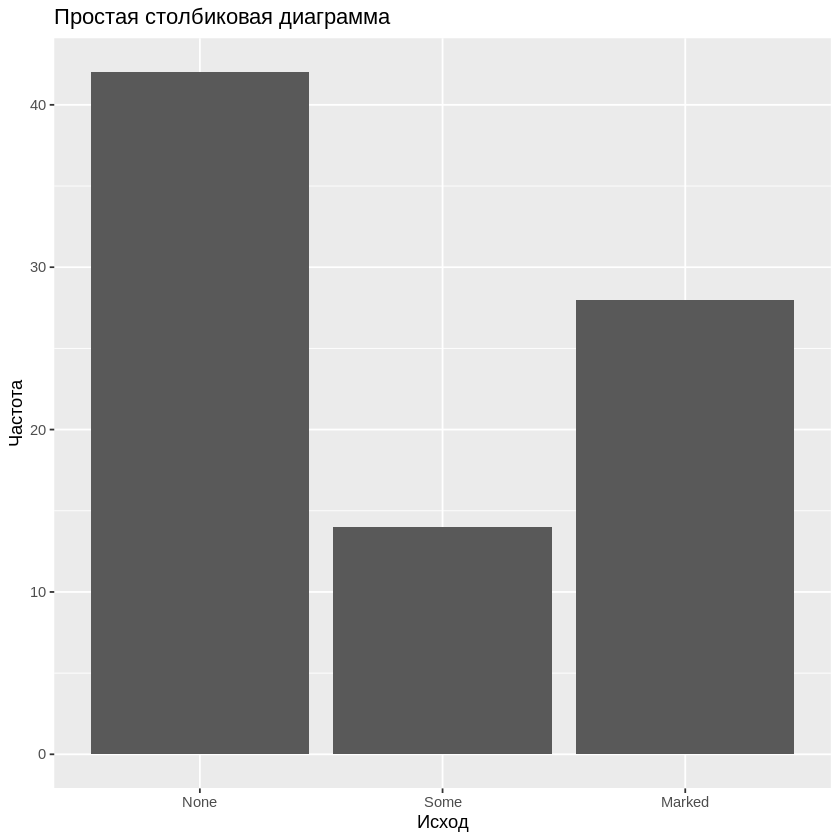

In [43]:
ggplot(Arthritis, aes(x = Improved)) +
  geom_bar() +
  labs(title = "Простая столбиковая диаграмма",
        x = "Исход",
        y = "Частота")

Ниже горизонтальная столбиковая диаграмма

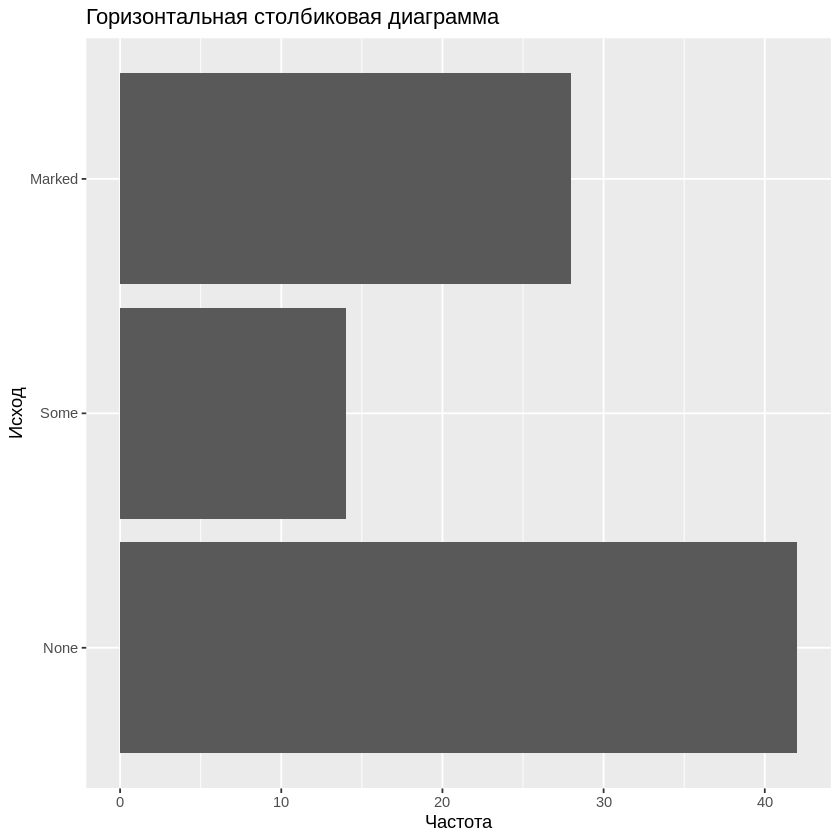

In [44]:
ggplot(Arthritis, aes(x = Improved)) +
      geom_bar() +
      labs(title = "Горизонтальная столбиковая диаграмма",
      x = "Исход",
      y = "Частота") +
      coord_flip()

Но что получится, если метки окажутся слишком длинными? В разделе ниже вы увидите, как настроить отображение меток, чтобы они не перекрывались на диаграмме.

### Столбиковые диаграммы: составные, с группировкой и спинограммы
Главный вопрос в исследовании артрита: «Как степень улучшения
состояния коррелирует с получением пациентами плацебо и лекарства?» Для этого можно создать сводную таблицу переменных с помощью функции `table()`:

In [45]:
table(Arthritis$Improved, Arthritis$Treatment)

        
         Placebo Treated
  None        29      13
  Some         7       7
  Marked       7      21

Табличное представление, конечно, может пригодиться, но результаты будет проще понять, если изобразить их с помощью гистограммы. Отношения между двумя категориальными переменными можно изобразить с помощью столбиковых диаграмм составных, с группировкой или спинограмм.

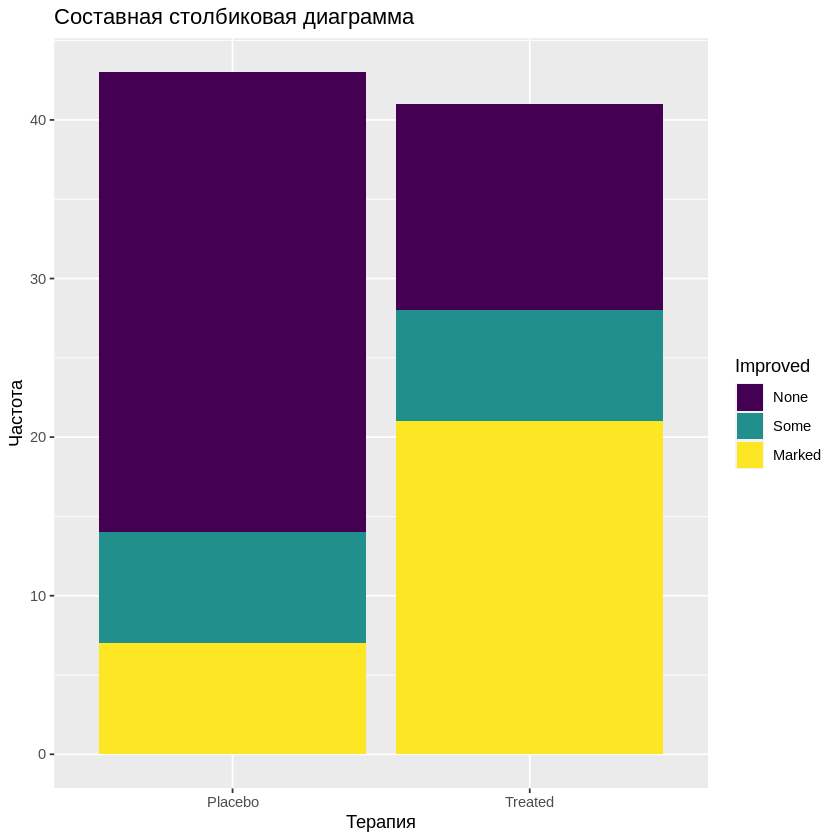

In [46]:
# Составная столбиковая диаграмма
ggplot(Arthritis, aes(x = Treatment, fill = Improved)) +
  geom_bar(position = "stack") +
  labs(title = "Составная столбиковая диаграмма",
        x = "Терапия",
        y = "Частота")

В составной столбиковой диаграмме (stacked bar chart) каждый сегмент представляет частоту или долю случаев в данной комбинации Treatment (Лечение) – Placebo (плацебо) и Treated (лекарство) – и Improvement (Улучшение) – None (нет), Some (некоторое) и Marked (заметное). Сегменты откладываются отдельно для каждого способа лечения.

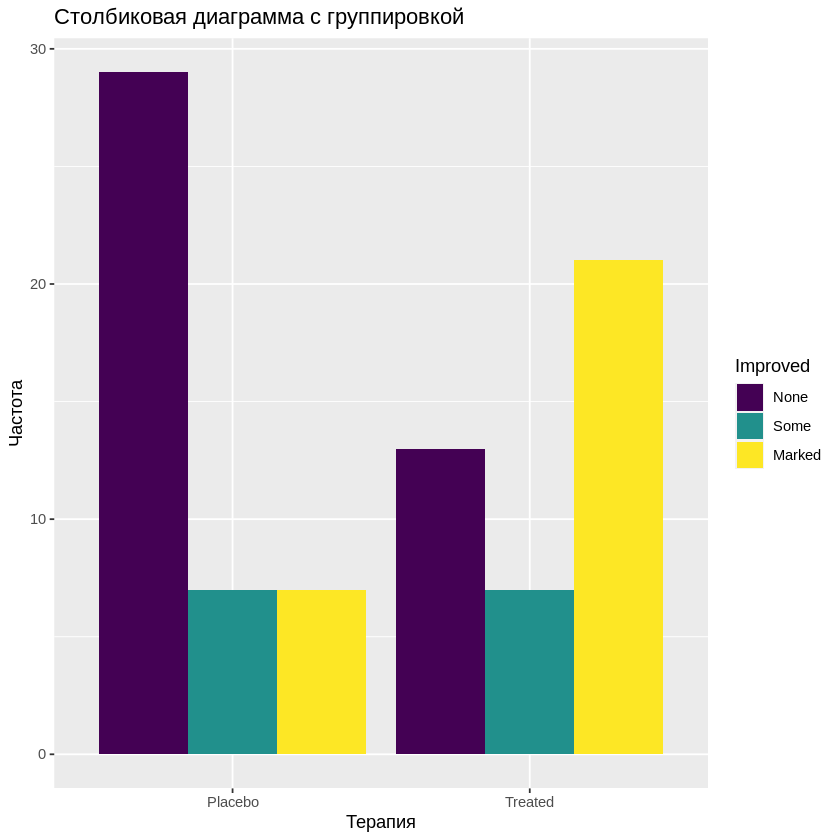

In [47]:
# Столбиковая диаграмма с группировкой
ggplot(Arthritis, aes(x = Treatment, fill = Improved)) +
      geom_bar(position = "dodge") +
      labs(title = "Столбиковая диаграмма с группировкой",
      x = "Терапия", y = "Частота")

Столбиковая диаграмма с группировкой (grouped bar chart) позволяет сравнить степень улучшения для обоих способов лечения.

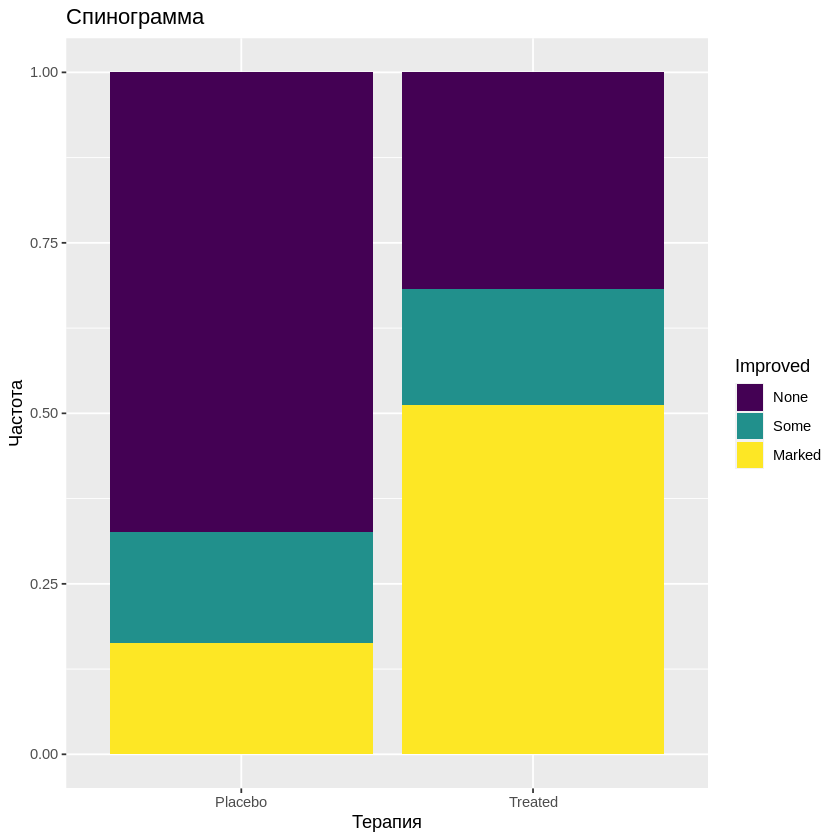

In [48]:
# Спинограмма
ggplot(Arthritis, aes(x = Treatment, fill = Improved)) +
      geom_bar(position = "fill") +
      labs(title = "Спинограмма",
            x = "Терапия",
            y = "Частота")

Спинограмма (filled bar chart) – та же самая составная столбиковая диаграмма, масштаб которой изменен так, что высота каждого столбца равна 1, а высоты сегментов представляют их пропорции.

Спинограммы особенно удобны для сравнения пропорций категориальных переменных. Например, данная спинограмма ясно показывает больший процент пациентов с заметным улучшением, получавших лекарство, по сравнению с пациентами, получавшими плацебо.

### Столбиковые диаграммы средних значений
Столбиковая диаграмма не обязательно отражает количество или частоту значений. Столбиковые диаграммы можно строить на основе средних значений, медиан, процентилей, стандартных отклонений и т. д., обобщая данные с использованием соответствующих статистик и передавая результаты пакету ggplot2.

На следующем графике мы построим средний уровень неграмотности для регионов США в 1970 году. Распространяемый с R набор данных `state.x77` содержит уровни неграмотности по штатам, а набор данных `state.region` – названия регионов в каждом штате.

In [49]:
states <- data.frame(state.region, state.x77)
states

,state.region,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,South,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,West,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,West,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,South,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,West,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,West,2541,4884,0.7,72.06,6.8,63.9,166,103766
Connecticut,Northeast,3100,5348,1.1,72.48,3.1,56.0,139,4862
Delaware,South,579,4809,0.9,70.06,6.2,54.6,103,1982
Florida,South,8277,4815,1.3,70.66,10.7,52.6,11,54090


In [50]:
# Генерируются средние значения по регионам
plotdata <- states %>%
  group_by(state.region) %>%
  summarize(mean = mean(Illiteracy))
plotdata

state.region,mean
<fct>,<dbl>
Northeast,1.000000
South,1.737500
North Central,0.700000
West,1.023077


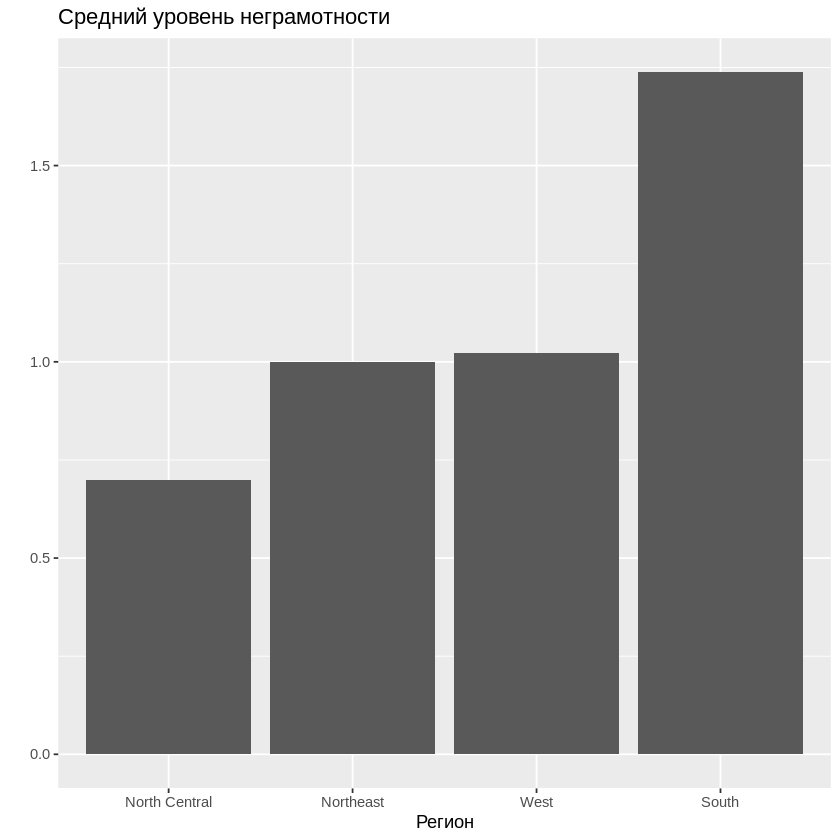

In [51]:
# Вывод столбиковой диаграммы на основе отсортированных средних значений
ggplot(plotdata, aes(x = reorder(state.region, mean), y = mean)) +
      geom_bar(stat = "identity") +
      labs(x = "Регион",
          y = "",
          title = "Средний уровень неграмотности")

Обычно функция `geom_bar()` вычисляет и отображает количества наблюдений, но добавление параметра `stat="identity"` заставляет ее отображать указанные числа (в данном случае средние значения). Функция `reorder()` используется для упорядочения столбцов по возрастанию среднего значения неграмотности.

При выводе на диаграммах обобщающих статистик, таких как средние значения, рекомендуется указывать степень их изменчивости. Одной из мер изменчивости является стандартная ошибка статистики – оценка ожидаемой дисперсии в гипотетических повторяющихся выборках.

In [57]:
# Генерируются средние значения и стандартные ошибки по регионам
plotdata <- states %>%
  group_by(state.region) %>%
  summarize(n=n(), mean = mean(Illiteracy), se = sd(Illiteracy)/sqrt(n))
plotdata

state.region,n,mean,se
<fct>,<int>,<dbl>,<dbl>
Northeast,9,1.000000,0.09279607
South,16,1.737500,0.13810473
North Central,12,0.700000,0.04082483
West,13,1.023077,0.16876392


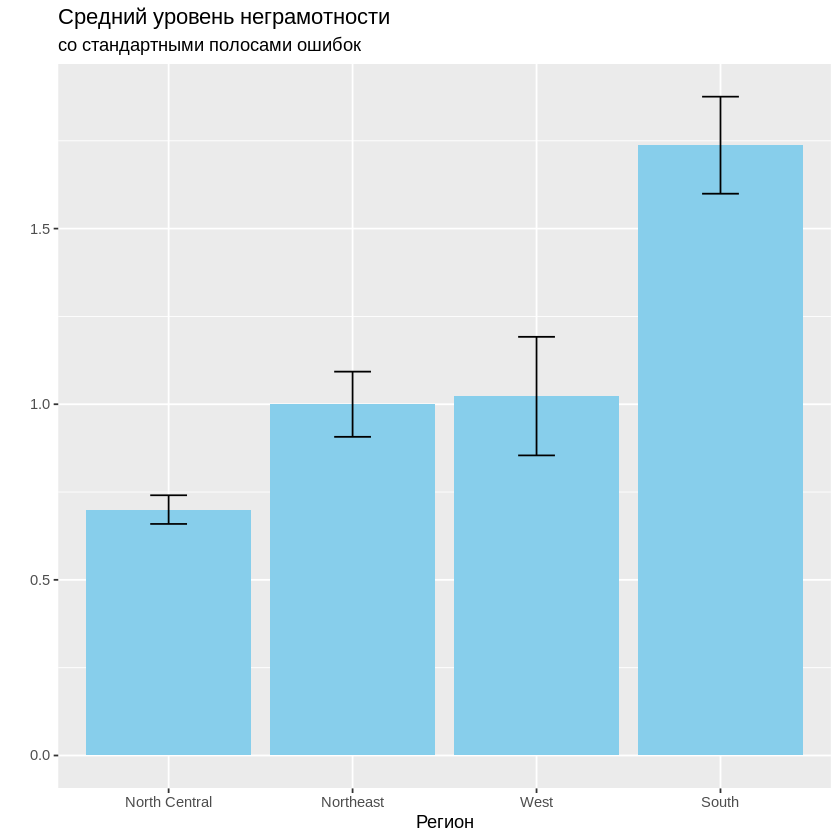

In [59]:
# Вывод столбиковой диаграммы на основе отсортированных средних значений
ggplot(plotdata, aes(x=reorder(state.region, mean), y=mean)) +
  geom_bar(stat="identity", fill="skyblue") +
    geom_errorbar(aes(ymin=mean-se, ymax=mean+se), width=0.2) + # Вывод интервалов стандартной ошибки
      labs(x="Регион", y="", title = "Средний уровень неграмотности", subtitle = "со стандартными полосами ошибок")

Здесь сначала для каждого региона вычисляются средние значения и стандартные ошибки. Затем полученные средние значения сортируются в порядке возрастания. Цвет изменился с темно-серого по умолчанию на более светлый (небесно-голубой), чтобы «усы» (планки), отражающие погрешности, которые будут добавлены на следующем шаге, выделялись на их фоне. Наконец, в диаграмму добавляются планки погрешностей. Параметр
width в функции geom_errorbar() управляет горизонтальной шириной отображаемых планок погрешностей и служит чисто эстетическим целям – он не имеет статистического значения. Можно видеть, что среднее значение уровня неграмотности для Северо-Центрального (North Central) региона не только самое низкое, но и самое надежное (имеет наименьшую изменчивость), а среднее значение для Западного (West) региона является наименее надежным (имеет наибольшую изменчивость).

### Настройка столбиковых диаграмм
Столбиковые диаграммы имеют несколько параметров, управляющих внешним видом, которые можно настроить. Чаще всего настраиваются цвет и подписи. Мы рассмотрим оба по очереди.

#### Цвета
Пользователь имеет возможность назначать свои цвета заливки и рамок. Функция `geom_bar()` принимает параметр `fill="цвет"` – цвет заливки, а `color="цвет"` – цвет рамок.



> Параметры fill и color
Многие функции в пакете `ggplot2` принимают параметр `fill`, определяющий цвет площадных геометрических объектов (таких как столбики, секторы круга, прямоугольники), и параметр `color`, определяющий цвет геометрических объектов, не имеющих площади (линий, точек и рамок).

Например, следующий код:



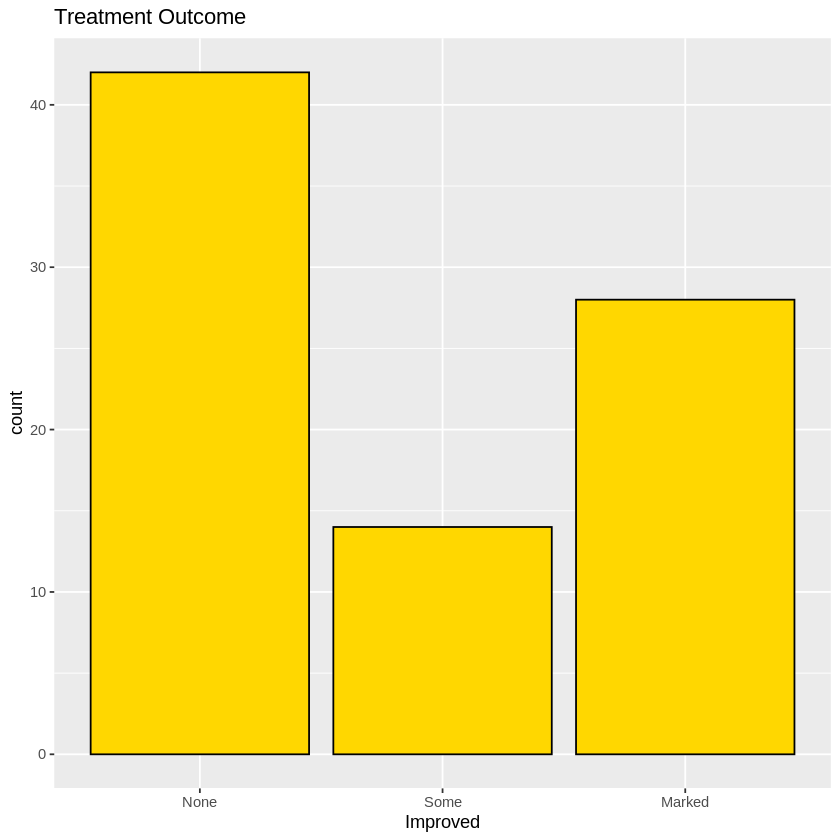

In [60]:
data(Arthritis, package="vcd")
ggplot(Arthritis, aes(x=Improved)) +
  geom_bar(fill="gold", color="black") +
  labs(title="Treatment Outcome")

В предыдущем примере каждый столбик окрашивался в один цвет. Однако есть возможность назначать цвета разным уровням категориальной переменной. Например, следующий код:

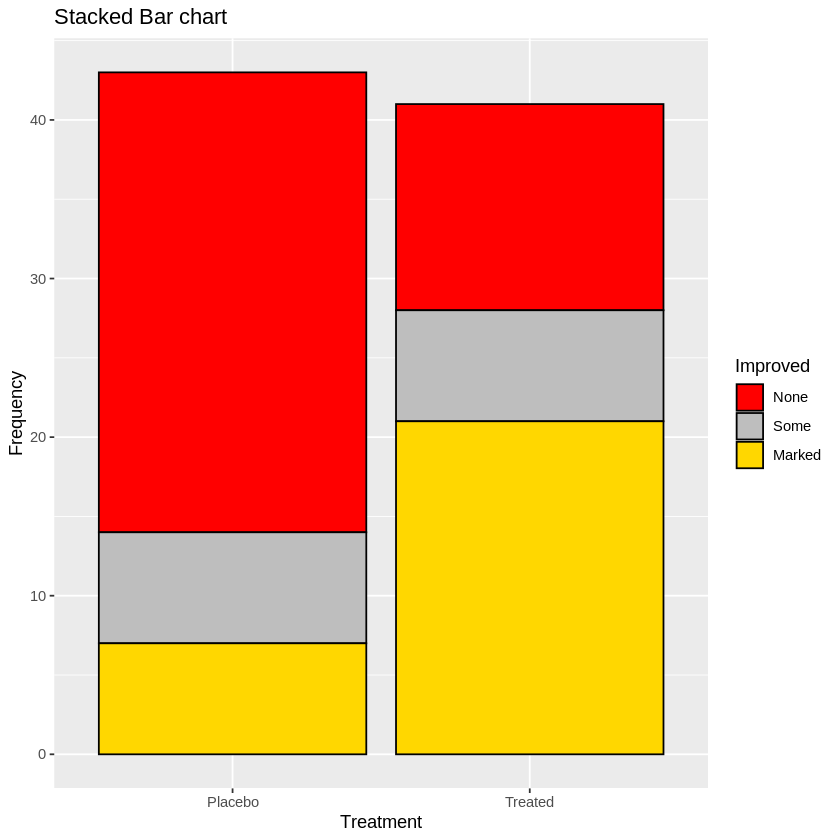

In [61]:
ggplot(Arthritis, aes(x=Treatment, fill=Improved)) +
  geom_bar(position = "stack", color="black") +
  scale_fill_manual(values=c("red", "grey", "gold")) +
    labs(title="Stacked Bar chart", x="Treatment", y="Frequency")

Здесь цвета заливки столбиков зависят от уровней переменной Improved. Функция `scale_fill_manual(`) назначает красный цвет для значения None, серый – для значения Some и желтый – для значения Marked. Список с названиями цветов можно найти по адресу: http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf. В главе 19 мы обсудим другие методы назначения цветов.

#### Подписи
Когда на диаграмме присутствует много столбцов, их подписи могут перекрываться. Рассмотрим пример. Набор данных `mpg` в пакете `ggplot2` описывает расход топлива для 38 популярных моделей автомобилей, выпускавшихся с 1999 по 2008 год. Все модели характеризуются набором параметров (тип трансмиссии, количество цилиндров в двигателе и т. д.). Допустим, мы решили подсчитать количество экземпляров каждой модели, включенных в набор данных. Следующий код:

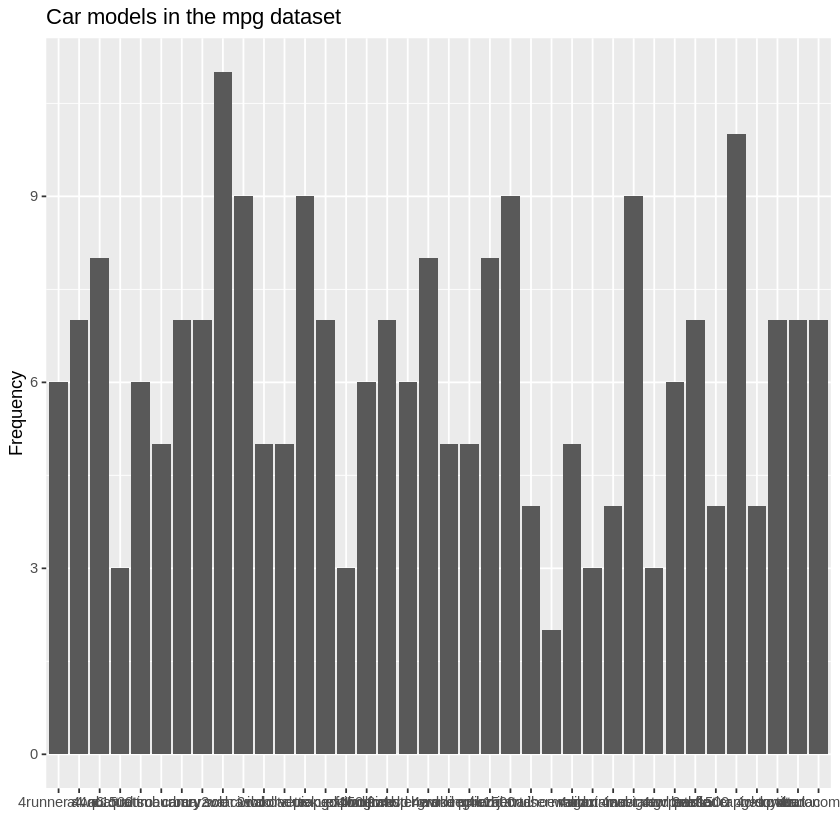

In [62]:
ggplot(mpg, aes(x=model)) +
  geom_bar() +
    labs(title="Car models in the mpg dataset", y="Frequency", x="")

Даже я в своих очках не могу это прочитать. Две простые настройки сделают подписи читабельными. Во-первых, данные можно представить в виде горизонтальной столбиковой диаграммы.

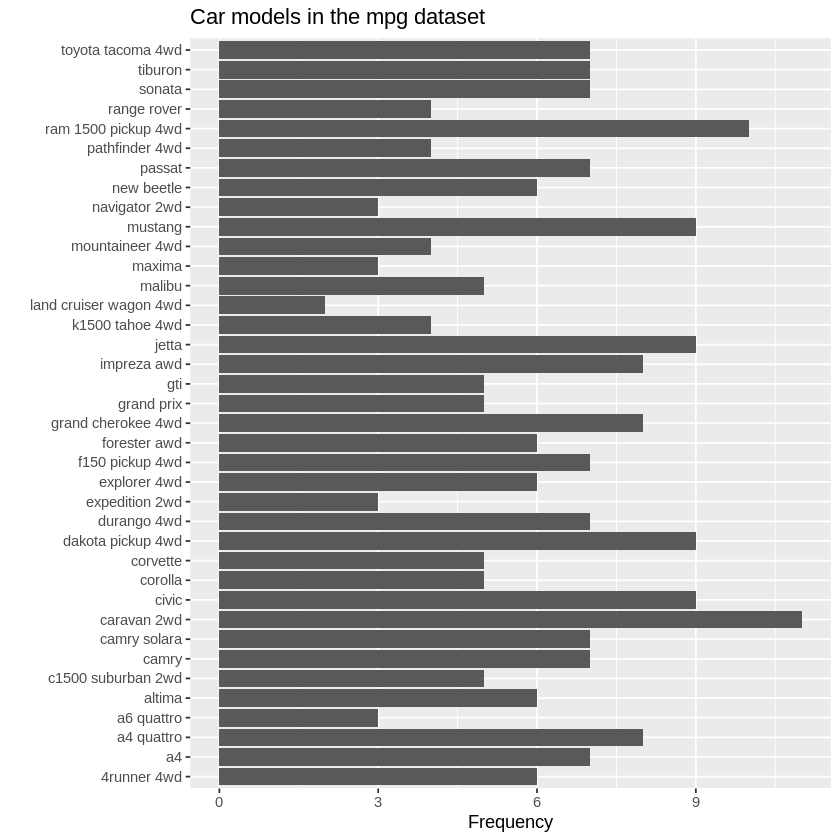

In [63]:
ggplot(mpg, aes(x=model)) +
  geom_bar() +
    labs(title="Car models in the mpg dataset", y="Frequency", x="") +
      coord_flip()

Во-вторых, можно повернуть подписи на некоторый угол и использовать шрифт меньшего размера.

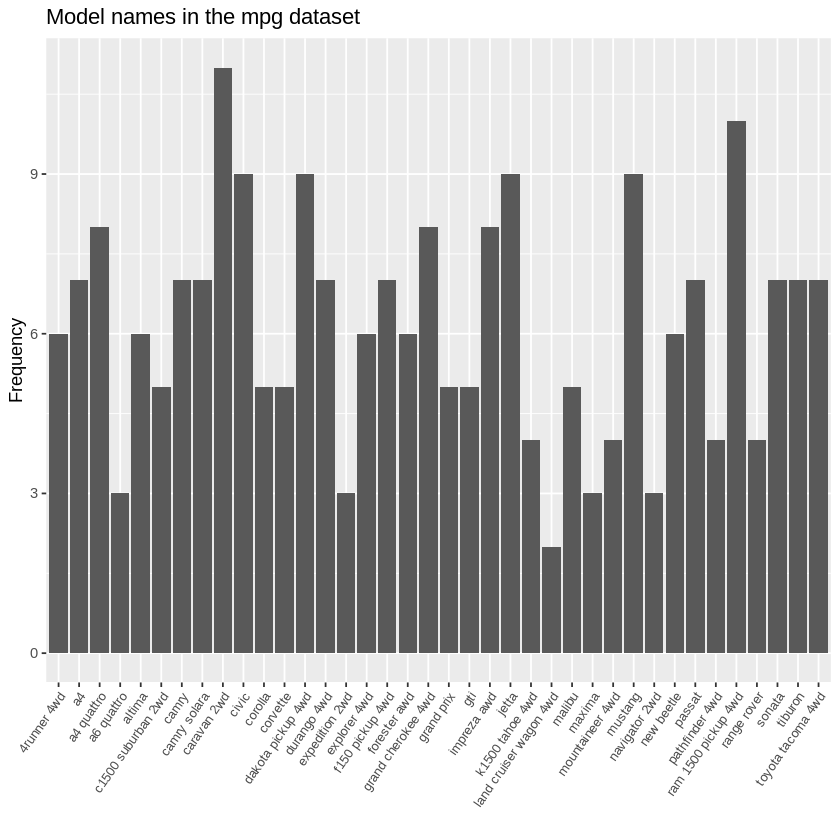

In [67]:
ggplot(mpg, aes(x=model)) +
  geom_bar() +
  labs(title="Model names in the mpg dataset", y="Frequency", x="") +
    theme(axis.text.x = element_text(angle = 55, hjust = 1, size=8))

В главе 19 мы более подробно обсудим функцию `theme()`. Наряду со столбиковыми диаграммами для визуализации категориальных данных не менее часто используются круговые диаграммы. Рассмотрим
их далее.

## Круговые диаграммы
Несмотря на то что круговые диаграммы широко используются в деловом мире, они критикуются большинством статистиков, включая авторов документации R. Они рекомендуют применять столбиковые или точечные диаграммы вместо круговых, потому что людям легче сравнивать длины, чем площади и объемы. Возможно, именно из этих соображений круговые диаграммы имеют довольно ограниченную поддержку в R по сравнению с другими статистическими программами.

Однако иногда круговые диаграммы могут быть по-настоящему полезными. В частности, они хорошо передают отношения часть–целое. Например, круговую диаграмму можно использовать для отображения процента штатных преподавателей-женщин в университете.

Создать круговую диаграмму в R можно с помощью функции `pie()`, но, как я уже сказал, эта функция имеет довольно ограниченные возможности, а создаваемые ею диаграммы смотрятся непривлекательно. Чтобы решить эту проблему, я создал пакет ggpie, позволяющий создавать разнообразные круговые диаграммы с помощью ggplot2 (только, пожалуйста, не шлите мне гневных писем!). Его можно установить из моего репозитория на GitHub, как показано ниже:

In [68]:
if(!require(remotes)) install.packages("remotes")
remotes::install_github("rkabacoff/ggpie")

Loading required package: remotes




rlang      (1.1.3 -> 1.1.4) [CRAN]
cli        (3.6.2 -> 3.6.3) [CRAN]
munsell    (0.5.0 -> 0.5.1) [CRAN]
farver     (2.1.1 -> 2.1.2) [CRAN]
tidyselect (1.2.0 -> 1.2.1) [CRAN]
isoband    (0.2.6 -> 0.2.7) [CRAN]
gtable     (0.3.4 -> 0.3.5) [CRAN]
ggplot2    (3.4.4 -> 3.5.1) [CRAN]


Installing 8 packages: rlang, cli, munsell, farver, tidyselect, isoband, gtable, ggplot2

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpHa4jH9/remotes137191cac95/Rkabacoff-ggpie-0316ac3/DESCRIPTION’ ... OK
* preparing ‘ggpie’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘ggpie_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Базовый синтаксис функции:
```
ggpie(data, x, by, offset, percent, legend, title)
```
где
* data – таблица данных;
* x – категориальная переменная для отображения на диаграмме;
* by – необязательная вторая категориальная переменная, если имеется; для каждого уровня этой переменной будет построена отдельная круговая диаграмма;
* offset – расстояние между подписями секторов круговой диаграммы и началом координат. Значение 0.5 поместит подписи в центры секторов, а значения больше 1.0 – за пределами секторов;
* percent – логическое значение: FALSE подавляет вывод символа процента;
* legend – логическое значение: FALSE подавляет вывод легенды и добавляет подписи к секторам на самой диаграмме;
* title – необязательный заголовок.
Используя дополнительные параметры (описаны на веб-сайте проекта ggpie), можно настроить внешний вид круговой диаграммы в довольно широких пределах. Давайте создадим круговую диаграмму, отображающую распределение автомобилей по классам в таблице данных mpg:

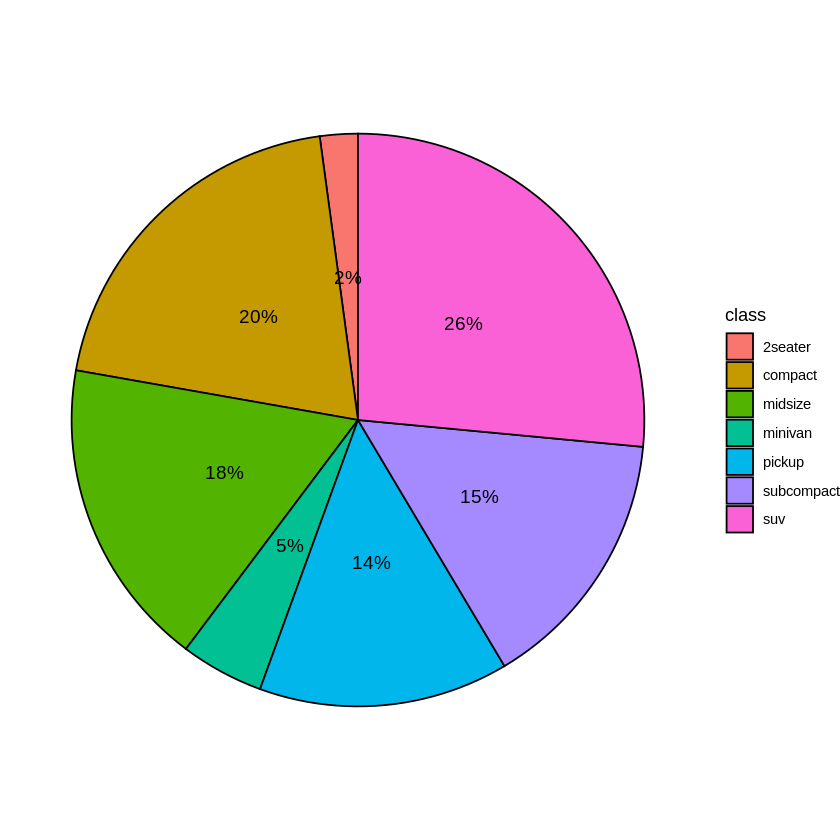

In [69]:
library(ggplot2)
library(ggpie)
ggpie(mpg, class)

Как показывает диаграмма, 26 % автомобилей относятся к классу кроссоверов и только 2 % – к классу двухместных автомобилей.

Следующий код выводит круговую диаграмму без легенды и с подписями для каждого сектора. Кроме того, подписи вынесены за пределы секторов, а также добавлен заголовок:

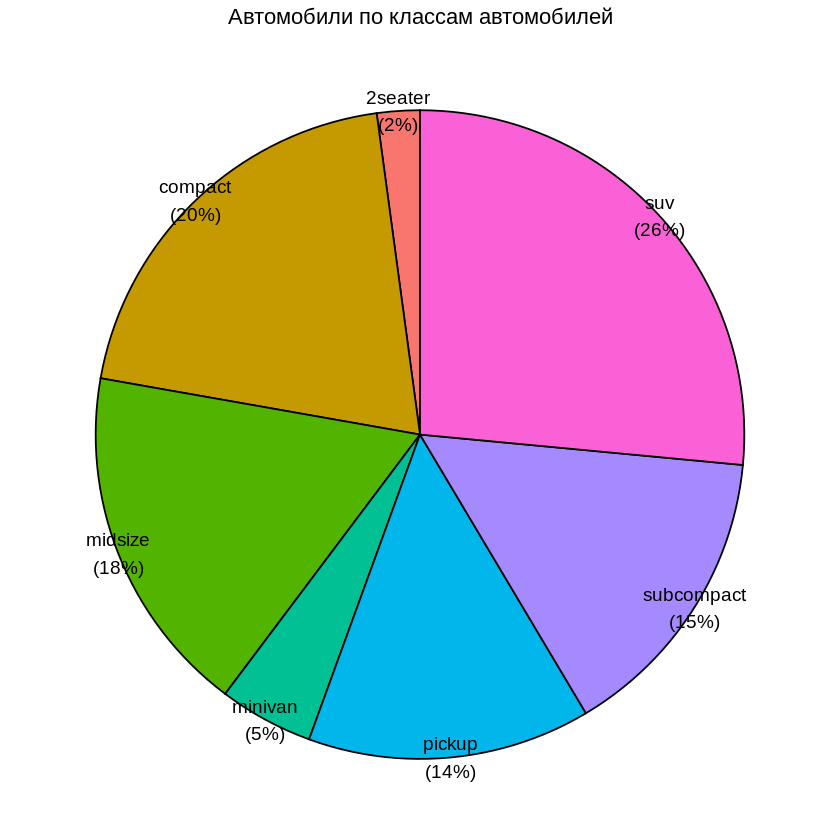

In [74]:
ggpie(mpg, class, legend=FALSE, offset=1, title="Автомобили по классам автомобилей")

В заключительном примере показано распределение автомобилей по классам в разные годы.

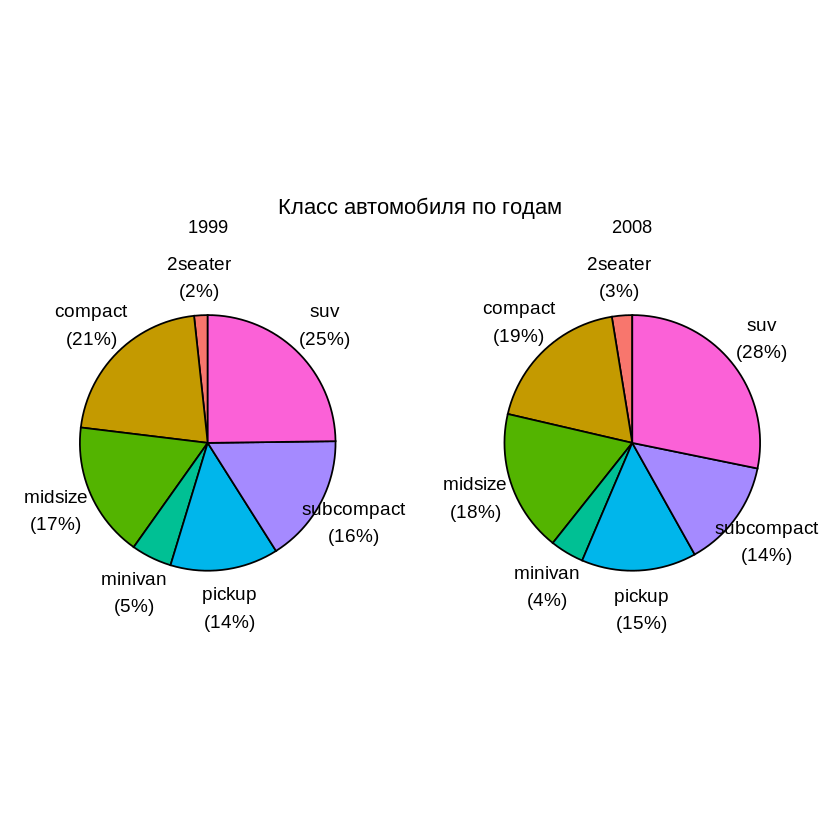

In [75]:
ggpie(mpg, class, year, legend=FALSE, offset=1.3, title="Класс автомобиля по годам")

Как видите, в период с 1999 по 2008 год распределение автомобилей по классам оставалось довольно постоянным. Пакет ggpie может создавать более сложные круговые диаграммы, настраиваемые в широких пределах. Подробности ищите в документации (https://rkabacoff.github.io/ggpie).

## Диаграммы «плоское дерево»
Круговые диаграммы имеют альтернативу – диаграммы вида «плоское дерево» (tree map), отображающие распределение категориальной переменной с использованием прямоугольников с площадями, пропорциональными уровням переменных. Я покажу, как создавать диаграммы «плоское дерево» с помощью пакета `treemapify`. Обязательно установите его, прежде чем продолжить (`install.packages("treemapify")`).
Начнем с создания диаграммы «плоское дерево», отображающей распределение производителей автомобилей в таблице данных mpg.

In [76]:
install.packages("treemapify")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘markdown’, ‘Rcpp’, ‘png’, ‘jpeg’, ‘shades’, ‘gridtext’, ‘ggfittext’




In [81]:
library(ggplot2)
library(dplyr)
library(treemapify)

In [82]:
# Получение обобщенных данных
plotdata <- mpg %>% count(manufacturer)

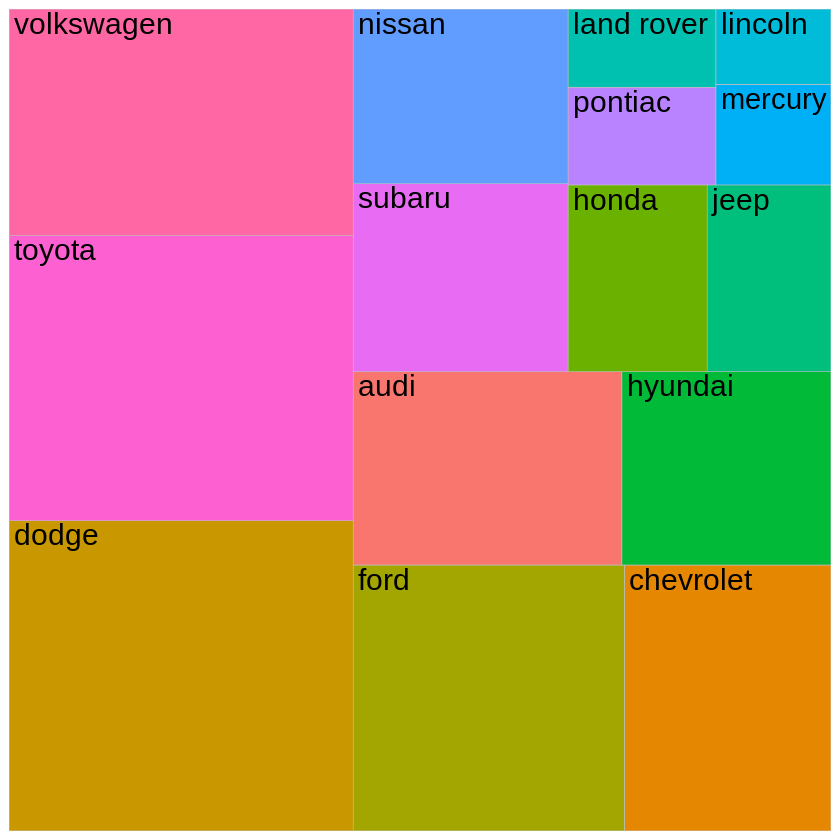

In [83]:
# Создание диаграммы «плоское дерево»
ggplot(plotdata,aes(fill = manufacturer,area = n, label = manufacturer)) +
  geom_treemap() +
    geom_treemap_text() +
      theme(legend.position = "none")

Здесь сначала вычисляется количество автомобилей, произведенных каждым производителем, на основе переменной manufacturer. Затем эта информация передается в ggplot2 для создания диаграммы. В вызове функции `aes()` в параметре `fill` указана категориальная переменная, в параметре `area` – число производителей, а в необязательном параметре `label` – переменная, которая должна использоваться для создания подписей ячеек. Функция `geom_treemap()` создает диаграмму, а функция `geom_treemap_text()` добавляет подписи к ячейкам. Функция `theme()` используется для подавления вывода легенды, которая здесь не нужна, потому что все ячейки и без того подписаны.

Как видите, диаграммы «плоское дерево» можно использовать для визуализации категориальных переменных с несколькими уровнями (в отличие от круговых диаграмм). В следующем примере добавлена вторая переменная – drivetrain. На ней автомобили делятся не только по производителям, но также по типу привода: на переднеприводные (front-wheel), заднеприводные (rear-wheel) и полноприводные (fourwheel).


In [84]:
library(ggplot2)
library(dplyr)
library(treemapify)

In [86]:
# Вычисляется количество ячеек
plotdata <- mpg %>%
  count(manufacturer, drv)
plotdata

manufacturer,drv,n
<chr>,<chr>,<int>
audi,4,11
audi,f,7
chevrolet,4,4
chevrolet,f,5
chevrolet,r,10
dodge,4,26
dodge,f,11
ford,4,13
ford,r,12


In [87]:
# Замена подписей для уровней переменной drivetrains
plotdata$drv <- factor(plotdata$drv,levels=c("4", "f", "r"), labels=c("4-wheel", "front-wheel", "rear"))
plotdata

manufacturer,drv,n
<chr>,<fct>,<int>
audi,4-wheel,11
audi,front-wheel,7
chevrolet,4-wheel,4
chevrolet,front-wheel,5
chevrolet,rear,10
dodge,4-wheel,26
dodge,front-wheel,11
ford,4-wheel,13
ford,rear,12


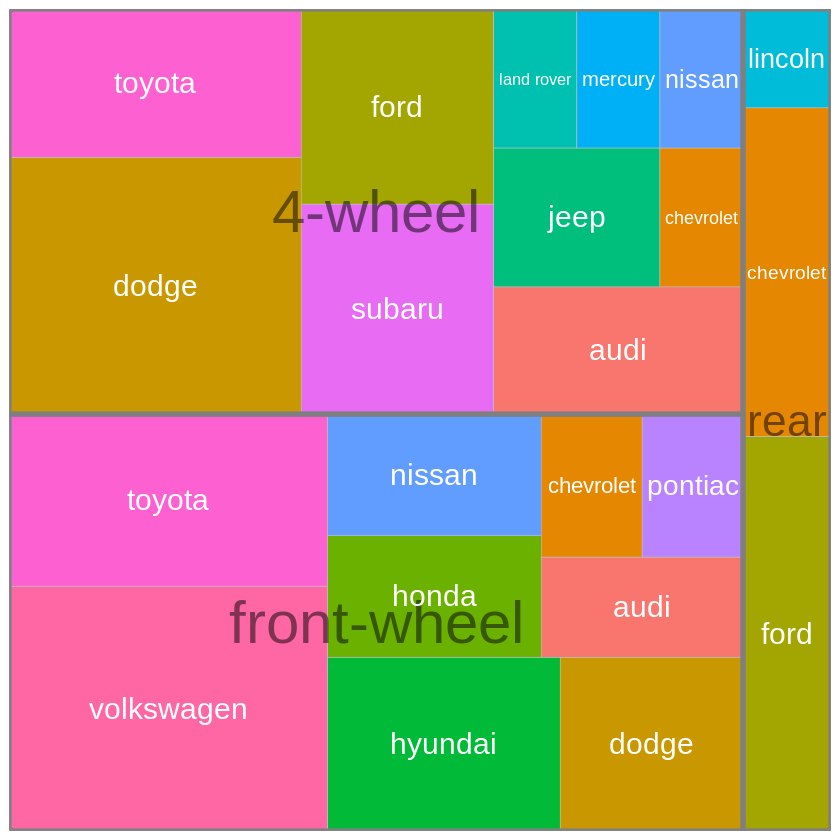

In [88]:
# Создание диаграммы «плоское дерево»
ggplot(plotdata,aes(fill = manufacturer, area = n, label = manufacturer, subgroup=drv)) +
  geom_treemap() +
    geom_treemap_subgroup_border() +
      geom_treemap_subgroup_text( place = "middle", colour = "black", alpha = 0.5, grow = FALSE) +
        geom_treemap_text(colour = "white", place = "centre", grow=FALSE) +
          theme(legend.position = "none")

Сначала определяются количества автомобилей для разных комбинаций производитель/привод. Затем для уровней переменной `drivetrain` определяются более подходящие подписи. Полученная в результате таблица данных передается пакету `ggplot2` для создания диаграммы. Параметр subgroup в функции `aes()` создает отдельные поддиаграммы для каждого типа привода. Функции `geom_treemap_border()` и `geom_treemap_subgroup_text()` добавляют рамки и подписи для подгрупп соответственно. Параметры в каждой из этих функций определяют внешний вид диаграммы. Подписи, соответствующие подгруппам, размещаются по центру и выводятся полупрозрачным шрифтом `(alpha=0.5)`. Размер шрифта подписей остается постоянного размера и не увеличивается для заполнения всей области `(grow=FALSE)`. Подписи ячеек выводятся белым шрифтом по центру каждой ячейки и тоже не увеличиваются для заполнения всей ячейки.

На диаграмме отчетливо видно, например, что Hyundai выпускает автомобили с передним приводом, но не выпускает автомобилей с задним или полным приводом. Основную массу автомобилей с задним приводом производят Ford и Chevrolet. Больше всего полноприводных автомобилей произведено компанией Dodge.

Теперь перейдем к гистограммам. В отличие от столбиковых, круговых и древовидных диаграмм, гистограммы описывают распределение значений непрерывной переменной.

## Гистограммы
#P.n. 189